### PSE GYM- ASU 

In [1]:
# from product_management import Product_Management, doslfp_optimizier
# main.py
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.spatial import ConvexHull
import random
from pyomo.environ import ConcreteModel, Set, Param, Block
import pyomo.environ as pyo
import pyomo.opt as opt
solver = pyo.SolverFactory('gurobi')
import math
from math import ceil
import csv
import json
import time
from math import sqrt
import copy
import ast

### ASU Simulation

In [ ]:
from ASU_opt_model import optimize_ASU
from ASU_env import ASUEnv

lookahead = 4
env_id = 'ASU1'
env = ASUEnv('ASU1')

# get lookahead value from the environment to feed into the optimizer
asu_optimizer = optimize_ASU('ASU1', lookahead)

env.reset()
current_day = 1
optimization_day1_cost = {}
opt_lambda = {}
opt_reward = {}

terminated = False
while not terminated:

    # state = env.render()
    state = env._get_state(mode='dict')
    asu_optimizer.update_state(state)
    
    # Solve the optimization model
    objective = asu_optimizer.solve()
    day1_cost = asu_optimizer.day1_cost()
    optimization_day1_cost[current_day] = day1_cost  
    
    opt_day_lambda = asu_optimizer.extract_optimal_lambda()
    # fetch optimal hourly lambda values for the current day
    opt_lambda[current_day] = opt_day_lambda
    # based on opt_day_lambda, calculate the reward: opt_reward[current_day]
    
    day_reward = 0.0
    for hour in range(1, 25):
        # Retrieve the lambda values for this hour (assume keys in subdict are sorted correctly, e.g., 1, 2, ...).
        hourly_lambda = opt_day_lambda[hour]
        # Convert the lambda dict to a NumPy array. # For instance, if your extreme points indices are [1,2,...,n], sort the keys and build the array.
        lambda_array = np.array([hourly_lambda[k] for k in sorted(hourly_lambda.keys())], dtype=np.float32)
        # opt_action = {'lambda': lambda_array}
        opt_action = lambda_array
        
        # Take a step in the environment using this optimal action.
        # state, reward, done, info = env.step(opt_action)
        _, reward, terminated, _ , _ = env.step(opt_action)
        terminated = terminated.item()
        day_reward += reward.item()

    opt_reward[current_day] = day_reward

    # Approaching end of current day
    if terminated == True:
        print("Simulation complete for total of {} days".format(current_day))
    current_day += 1

Simulation complete for total of 7 days


In [5]:
print(optimization_day1_cost)
print(opt_reward)

{1: 1044.5566829738332, 2: 861.3592639213889, 3: 805.6513215031631, 4: 1007.3574626449497, 5: 887.7661076585582, 6: 927.1291526642696, 7: 1063.684094797056}
{1: -1044.55668258667, 2: -861.3592681884766, 3: -805.6513214111328, 4: -1007.3574638366699, 5: -887.7660980224609, 6: -927.2235565185547, 7: -1063.684097290039}


In [ ]:
x = [25580.19140625, 25456.962890625, 25345.283203125, 25311.83203125, 24997.77734375, 25070.81640625, 25016.078125, 25216.064453125, 25018.69140625, 24807.90625, 24362.5, 24062.79296875, 24106.544921875, 24181.099609375, 23862.39453125, 23856.48046875, 23538.78515625, 23244.265625, 23439.63671875, 23189.955078125, 23321.6875, 23282.58984375, 23399.044921875, 23282.73046875, 23529.94140625, 23289.1875, 22900.37109375, 23178.62109375, 22826.67578125, 22747.388671875, 22614.41015625, 22356.89453125, 22042.30078125, 21985.7421875, 21449.8125, 21487.29296875, 21704.99609375, 21686.80078125, 21671.70703125, 21632.23828125, 21233.369140625, 21663.69140625, 21719.978515625, 21592.974609375, 21652.037109375, 21464.630859375, 21304.400390625, 21470.265625, 20956.359375, 21101.5625, 21228.3125, 20973.771484375, 20811.71875, 20838.30078125, 20477.109375, 20749.76953125, 20778.921875, 20958.16015625, 20865.74609375, 20678.361328125, 20883.638671875, 20990.916015625, 20619.79296875, 20525.85546875, 20507.00390625, 20597.873046875, 20685.125, 20549.828125, 20719.564453125, 20516.263671875, 20382.416015625, 20188.033203125, 20195.31640625, 20318.931640625, 20203.46875, 20199.2421875, 20189.67578125, 20289.18359375, 20109.91796875, 20125.076171875, 20057.876953125, 19821.75, 19450.177734375, 19646.91015625, 19588.57421875, 19757.779296875, 19882.068359375, 20066.431640625, 20194.34375, 19941.751953125, 19822.619140625, 19553.06640625, 19276.833984375, 19330.64453125, 19050.17578125, 19232.72265625, 19073.17578125, 18857.44921875, 18552.6875, 18563.25, 18751.728515625, 18607.771484375, 18440.93359375, 18474.568359375, 18318.51953125, 18358.39453125, 18387.98046875, 18018.55078125, 18171.3671875, 18083.939453125, 17961.60546875, 17942.80859375, 17930.466796875, 17947.54296875, 17939.076171875, 18049.384765625, 17797.16015625, 17713.369140625, 17487.90625, 17701.50390625, 17270.13671875, 17442.26953125, 17435.41015625, 17185.16015625, 17343.66796875, 17094.9765625, 17483.6328125, 17266.474609375, 17089.130859375, 17036.41796875, 16998.83984375, 16731.755859375, 16689.302734375, 16773.390625, 16986.296875, 16857.443359375, 17112.669921875, 16927.98046875, 16940.80859375, 16635.14453125, 16901.921875, 16813.337890625, 16801.033203125, 16914.666015625, 16831.279296875, 16814.224609375, 17021.037109375, 16720.822265625, 16769.15625, 16727.666015625, 16953.44140625, 16709.91015625, 16711.109375, 16732.47265625, 16303.7392578125, 16558.015625, 16451.041015625, 16428.837890625, 16370.6904296875, 16224.859375, 16287.345703125, 16211.5361328125, 16138.716796875, 16355.484375, 16554.62109375, 16369.705078125, 16255.498046875, 16354.259765625, 16352.1875, 16124.017578125, 16445.41796875, 16365.427734375, 16481.87890625, 16325.4033203125, 16478.26953125, 16344.453125, 15927.640625, 15769.173828125, 15710.75, 15574.138671875, 15704.5546875, 15557.6064453125, 15592.2265625, 15769.240234375, 15713.7734375, 15539.326171875, 15720.0810546875, 15639.53125, 15796.0751953125, 15628.4658203125, 15712.9013671875, 15406.7685546875, 15613.3564453125, 15562.9658203125, 15521.9560546875, 15633.515625, 15773.458984375, 15775.9765625, 15442.3125, 15303.189453125, 15329.1923828125, 15278.1171875, 15156.4921875, 14967.9326171875, 15019.447265625, 15069.646484375, 15004.833984375, 15051.3466796875, 14893.830078125, 15252.3232421875, 15451.6220703125, 15393.1591796875, 15531.9189453125, 15509.755859375, 15542.2080078125, 15566.3515625, 15448.322265625, 15487.630859375, 15122.599609375, 15310.736328125, 15195.376953125, 15356.384765625, 15341.4716796875, 15387.40625, 15384.587890625, 15317.9404296875, 15441.990234375, 15356.462890625, 15258.583984375, 15367.119140625, 15426.103515625, 15294.9375, 15268.8251953125, 15303.5234375, 15411.220703125, 15467.53125, 15320.6376953125, 15366.044921875, 15298.4248046875, 15273.5048828125, 15113.841796875, 14959.759765625, 14961.240234375, 15004.2138671875, 15046.365234375, 14761.8408203125, 14986.712890625, 14856.416015625, 14883.4638671875, 14998.4091796875, 15080.322265625, 15111.853515625, 15167.6435546875, 15042.947265625, 14900.7109375, 15040.271484375, 14852.8642578125, 14869.7109375, 14716.0654296875, 14680.138671875, 14940.8935546875, 14714.271484375, 14758.849609375, 14647.126953125, 14474.744140625, 14461.1845703125, 14384.5185546875, 14407.865234375, 14197.037109375, 14027.892578125, 13930.630859375, 14063.072265625, 14100.294921875, 13966.287109375, 14038.8125, 13929.150390625, 13981.400390625, 13929.025390625, 14083.939453125, 14125.6904296875, 13988.8408203125, 14140.189453125, 13980.2734375, 14097.328125, 14068.111328125, 14007.541015625, 14092.2216796875, 14129.994140625, 13941.546875, 14177.2861328125, 14102.0283203125, 13881.720703125, 14087.5, 13968.568359375, 13802.96875, 13705.615234375, 13571.603515625, 13837.068359375, 13716.9189453125, 13699.7939453125, 13720.0205078125, 13724.7705078125, 13630.609375, 13607.3388671875, 13718.240234375, 13777.3955078125, 13814.111328125, 13634.240234375, 13483.486328125, 13578.859375, 13555.896484375, 13542.037109375, 13362.328125, 13529.5888671875, 13487.572265625, 13460.546875, 13527.3046875, 13482.9970703125, 13345.158203125, 13418.689453125, 13456.591796875, 13596.005859375, 13520.962890625, 13516.7890625, 13581.2236328125, 13454.96875, 13468.015625, 13462.078125, 13366.8232421875, 13282.451171875, 13324.1875, 13393.2294921875, 13494.7392578125, 13390.3935546875, 13419.591796875, 13481.662109375, 13481.771484375, 13512.8154296875, 13425.599609375, 13508.5673828125, 13439.962890625, 13406.212890625, 13301.3642578125, 13192.0810546875, 13190.9111328125, 13165.5830078125, 13184.1767578125, 13236.25, 13211.75, 13167.8720703125, 13057.4169921875, 13119.140625, 13018.220703125, 12993.15625, 13020.974609375, 13017.041015625, 12959.4921875, 13037.6455078125, 12929.7431640625, 12765.015625, 12800.130859375, 12742.27734375, 12829.52734375, 12823.6279296875, 12647.798828125, 12771.072265625, 12804.626953125, 12871.7470703125, 12776.9296875, 12736.2734375, 12674.9482421875, 12550.9892578125, 12594.5859375, 12468.736328125, 12493.1162109375, 12383.482421875, 12342.728515625, 12397.0595703125, 12358.498046875, 12266.458984375, 12211.8857421875, 12228.0146484375, 12242.630859375, 12162.0380859375, 12219.140625, 12184.6240234375, 12153.4521484375, 12048.431640625, 12177.865234375, 12077.486328125, 12072.9150390625, 12075.796875, 12065.2783203125, 12072.8125, 12039.3427734375, 11954.419921875, 12004.1904296875, 11945.8271484375, 12065.466796875, 12014.142578125, 12019.740234375, 12004.994140625, 11953.2548828125, 11927.662109375, 11827.4970703125, 11671.783203125, 11730.05859375, 11624.95703125, 11572.0703125, 11523.970703125, 11401.9580078125, 11315.1513671875, 11215.775390625, 11221.693359375, 11152.2890625, 11050.9462890625, 10981.0732421875, 11018.642578125, 11002.669921875, 10905.0068359375, 10913.73046875, 10918.7744140625, 10801.966796875, 10685.341796875, 10636.8818359375, 10631.25, 10643.470703125, 10601.1708984375, 10577.529296875, 10478.384765625, 10365.556640625, 10325.5595703125, 10165.2763671875, 10227.1689453125, 10139.220703125, 10016.537109375, 9899.0205078125, 9798.6904296875, 9755.09375]
#plot x


Text(0, 0.5, 'Price')

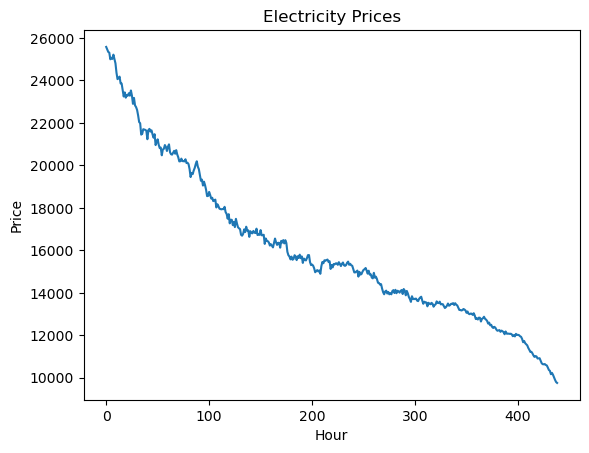

In [25]:

plt.plot(x)
plt.title('Electricity Prices')
plt.xlabel('Hour')
plt.ylabel('Price')